In [59]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image

**Task 1: Data Understanding and Visualization:**

Download the Provided Data and Complete the following task.

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

• Get the list of class directories from the train folder.

• Select one image randomly from each class.

• Display the images in a grid format with two rows using matplotlib.

In [57]:
# Define the path to the training dataset
train_dir = "/content/drive/MyDrive/FruitinAmazon/train"
val_dir = "/content/drive/MyDrive/FruitinAmazon/train"

In [24]:
# Get the list of class directories
class_names = os.listdir(train_dir)

In [25]:
# Select one random image from each class
selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        image_files = os.listdir(class_path)
        random_image = random.choice(image_files)  # Select a random image
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

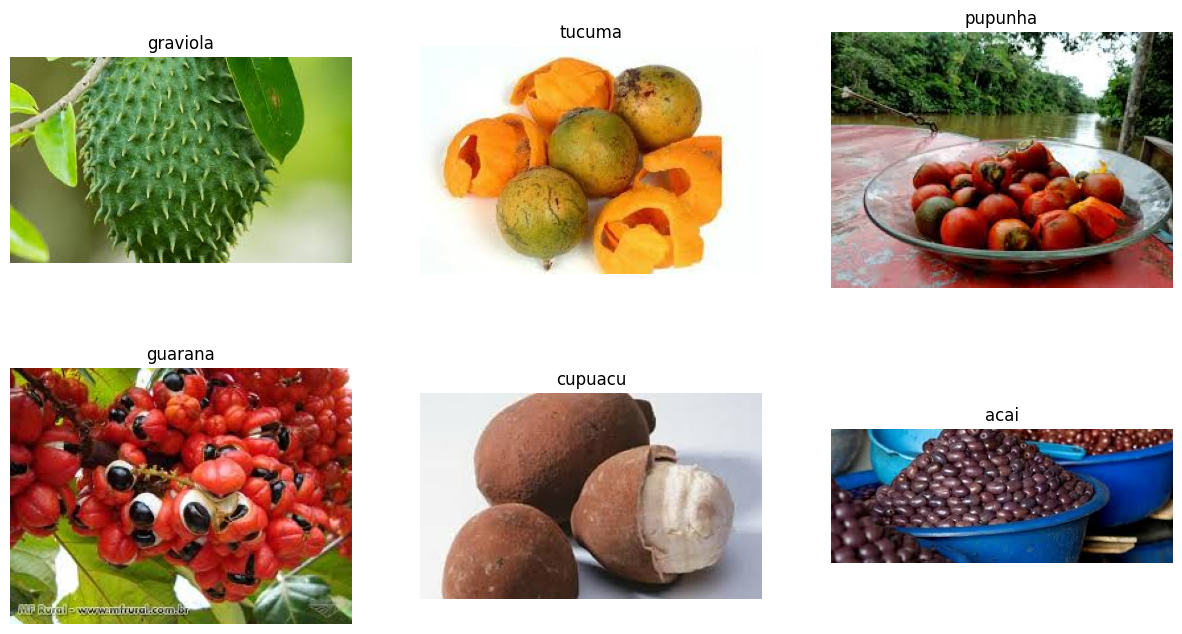

In [5]:
# Display the images in a grid format with two rows
num_images = len(selected_images)
cols = num_images // 2 + num_images % 2  # Compute number of columns
fig, axes = plt.subplots(2, cols, figsize=(15, 8))
axes = axes.flatten()

for i, img_path in enumerate(selected_images):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(selected_labels[i])
    axes[i].axis("off")

**What did you observe?**

Each fruit class is labeled with its name (e.g., "graviola," "tucuma," "pupunha," "guarana," "cupuaçu," "açaí").

The fruits appear in different color, shape, and texture, which is important for training a CNN model to distinguish between them.

In [26]:
# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**2.Check for Corrupted Image:**

Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No
Corrupted Images Found.”

• Hint:
– Iterate through each class subdirectory and check if each image is valid.

– Use the Image.open() function to attempt to load each image.

– If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from
the directory and print f"Removed corrupted image: {image_path}".

– Maintain a list of all corrupted image paths for reporting.

In [27]:
# Check for corrupted images
corrupted_images = []
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            try:
                with Image.open(image_path) as img:
                    img.verify()  # Verify if the image is valid
            except (IOError, SyntaxError):
                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")

No Corrupted Images Found.


**Task 2: Loading and Preprocessing Image Data in keras:**

In [39]:
# Define image size and batch size
img_height = 150
img_width = 150
batch_size = 32
validation_split = 0.2

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
).map(lambda x, y: (rescale(x), y))  # Apply rescaling directly

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
).map(lambda x, y: (rescale(x), y))  # Apply rescaling directly


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [42]:
#Normalization (Rescaling):
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]

**Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:**

**Convolutional Architecture:**

**• Convolutional Layer 1:**

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

**•Activation Layer:** ReLU activation

**• Pooling Layer 1:** Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

**• Convolutional Layer 2:**

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

**• Activation Layer:** ReLU activation

**• Pooling Layer 2:** Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

**Fully Connected Network Architecture:**

**• Flatten Layer:** Flatten the input coming from the convolutional layers

**• Input Layer:**

• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

**• Output Layer:**
– Number of Neurons: num classes (number of output classes)


In [43]:
# Get the list of class directories
class_names = os.listdir(train_dir)
num_classes = len(class_names)

In [44]:
# CNN Model Definition
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

In [45]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 43808)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,803,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,823,014 (10.77 MB)

 Trainable params: 2,823,014 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

**Task 4: Compile the Model**

**Model Compilation**

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [47]:
# Compile the model with different optimizer and loss function
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Task 4: Train the Model**

**Model Training**

• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.

• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", mode="min")
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss", mode="min")

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    callbacks=[checkpoint_cb, early_stopping_cb]
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.1453 - loss: 2.3932

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1437 - loss: 2.4923 - val_accuracy: 0.0000e+00 - val_loss: 1.7493
Epoch 2/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.1719 - loss: 1.9158

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.1970 - loss: 1.8769 - val_accuracy: 0.7778 - val_loss: 1.5344
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.3438 - loss: 1.7002 - val_accuracy: 0.0000e+00 - val_loss: 2.5500
Epoch 4/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.1875 - loss: 1.9830

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.2188 - loss: 1.9183 - val_accuracy: 0.3333 - val_loss: 1.5310
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4501 - loss: 1.4306 - val_accuracy: 0.3333 - val_loss: 1.6941
Epoch 6/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1797 - loss: 1.5968 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2010 - loss: 1.5797 - val_accuracy: 0.4444 - val_loss: 1.4388
Epoch 7/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.7578 - loss: 0.9982

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7539 - loss: 1.0115 - val_accuracy: 0.5000 - val_loss: 1.2691
Epoch 8/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6328 - loss: 1.0894

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6150 - loss: 1.1085 - val_accuracy: 0.7222 - val_loss: 1.1317
Epoch 9/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4844 - loss: 1.4368 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.5130 - loss: 1.3796 - val_accuracy: 0.8889 - val_loss: 0.7256
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.8043 - loss: 0.7550 - val_accuracy: 0.2778 - val_loss: 1.9913
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7895 - loss: 0.7042 - val_accuracy: 0.6667 - val_loss: 1.0369
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7561 - loss: 0.6630 - val_accuracy: 0.1667 - val_loss: 1.5492
Epoch 13/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6953 - loss: 0.6090 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7435 - loss: 0.5679 - val_accuracy: 0.9444 - val_loss: 0.3615
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9627 - loss: 0.2518 - val_accuracy: 0.5556 - val_loss: 0.9169
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9410 - loss: 0.2409 - val_accuracy: 0.8333 - val_loss: 0.6772
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7266 - loss: 0.6753 - val_accuracy: 0.8889 - val_loss: 0.5053
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9813 - loss: 0.1884 - val_accuracy: 0.8889 - val_loss: 0.4115
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 1.0000 - loss: 0.0633 - val_accuracy: 0.8889 - val_loss: 0.5384
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9891 - loss: 0.1100 - val_accuracy: 0.8333 - val_loss: 0.6528
Epoch 20/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.0639 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.0620 - val_accuracy: 0.8889 - val_loss: 0.3365
Epoch 21/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0360 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 1.0000 - loss: 0.0336 - val_accuracy: 0.8889 - val_loss: 0.2988
Epoch 22/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.0142 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 0.8889 - val_loss: 0.2855
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 0.8889 - val_loss: 0.3784
Epoch 24/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0073 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.9444 - val_loss: 0.1912
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.8889 - val_loss: 0.3932
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8333 - val_loss: 0.5061
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9444 - val_loss: 0.2394
Epoch 28/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8889 - val_loss: 0.2306
Epoch 29/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8889 - val_loss: 0.2528
Epoch 30/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8889 - val_loss: 0.3708
Epoch 31/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8889 - val_loss:

**Task 5: Evaluate the Model**

** Model Evaluation**

 • After training, evaluate the model using model.evaluate() on the test set to check the test
 accuracy and loss.

In [61]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(train_ds)

# Print the results
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0067
Test Accuracy: 1.0000
Test Loss: 0.0070


 Task 6: Save and Load the Model

 Model Saving and Loading  

 • Save the trained model to an .h5 file using model.save().
 • Load the saved model and re-evaluate its performance on the test set.

In [62]:
# Save the trained model
model.save("fruit_classification_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [63]:
# Load the saved model
loaded_model = tf.keras.models.load_model("fruit_classification_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


In [64]:
# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(train_ds)

# Print the results
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")
print(f"Loaded Model Test Loss: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 1.0000 - loss: 0.0075
Loaded Model Test Accuracy: 1.0000
Loaded Model Test Loss: 0.0070


 Task 7: Predictions and Classification Report

 Making Predictions
 • Use model.predict() to make predictions on test images.

 • Convert the model’s predicted probabilities to digit labels using np.argmax().

 • Also use from sklearn.metrics imp

In [65]:
import numpy as np

# Get predictions from the model
predictions = model.predict(train_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step


In [66]:
# Extract true labels from the test dataset
true_labels = np.concatenate([y.numpy() for x, y in train_ds])

In [67]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.21      0.21      0.21        14
           1       0.23      0.23      0.23        13
           2       0.25      0.25      0.25        12
           3       0.20      0.20      0.20        10
           4       0.18      0.18      0.18        11
           5       0.17      0.17      0.17        12

    accuracy                           0.21        72
   macro avg       0.21      0.21      0.21        72
weighted avg       0.21      0.21      0.21        72



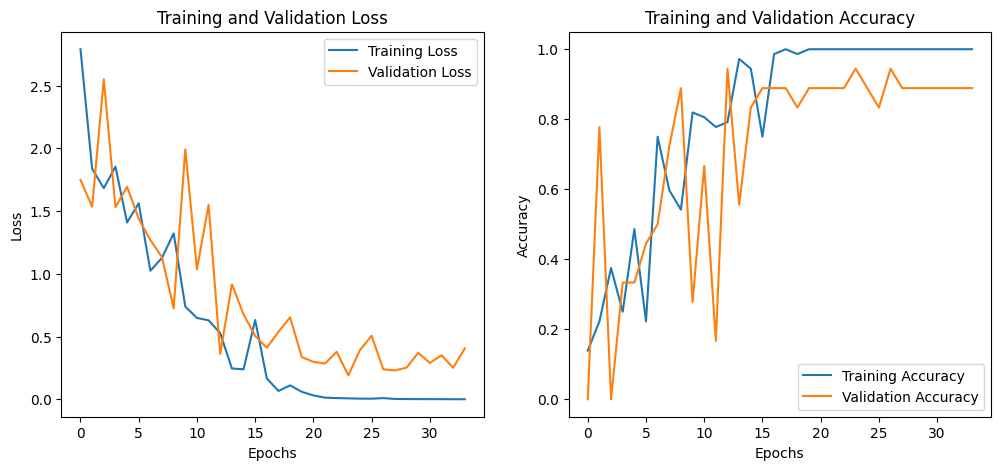

In [68]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing model training history
history_dict = history.history

# Plot training & validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Training Loss")
plt.plot(history_dict["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict["accuracy"], label="Training Accuracy")
plt.plot(history_dict["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()
